# Инициализируем данные по авиасообщениями между аэропортами (иными словами - задаем матрицу графа). Без использования NetworkX


In [1]:
# Аэропорты нумеруем простыми числами (случайным обрзом)
# Вообще, по идее, выгружать эту инфу извне, но лень :)

gr_mtx = [
    [1, 0, 1, 0, 0, 1, 0, 1, 1, 1], 
    [0, 1, 1, 1, 0, 0, 0, 1, 1, 0], 
    [1, 0, 1, 0, 1, 1, 0, 0, 0, 1], 
    [0, 0, 0, 1, 1, 1, 0, 0, 0, 1], 
    [0, 0, 0, 1, 1, 1, 1, 0, 0, 1], 
    [1, 0, 0, 1, 1, 1, 1, 0, 0, 0], 
    [1, 0, 0, 1, 1, 0, 1, 0, 1, 1], 
    [1, 0, 0, 1, 1, 1, 1, 1, 0, 0], 
    [0, 0, 0, 1, 1, 0, 1, 0, 1, 1], 
    [0, 0, 0, 1, 1, 0, 1, 0, 1, 1] 
]

n = 10 # количество аэропортов

# Обход графа (заражение с определенной вероятностью)

In [49]:
import numpy as np

def infect_net(start, prob, infected_points = {}, counter = 1):
    aa = np.arange(start = 0, stop = 2, step = 1)
    pp = [1 - prob, prob]
    rand = np.random.choice(a = aa, p = pp)

    
    if (rand == 0):
        return infected_points
    
    infected_points[start] = counter
    
    connected_points = gr_mtx[start]
    
    for i in range(0, n - 1):
        if (i != start and i not in infected_points and connected_points[i] == 1):
            infected_points = infect_net(i, prob, infected_points, counter + 1)
            counter = counter + 1
    
    return infected_points
    
result = infect_net(start = 2, prob = 0.8)


for i in range(0, n - 1):
    if (result.get(i) != None):
        print("Аэропорт №", i, 'Заразился за ', result.get(i), ' шагов обхода')
    

Аэропорт № 0 Заразился за  2  шагов обхода
Аэропорт № 2 Заразился за  1  шагов обхода
Аэропорт № 3 Заразился за  6  шагов обхода
Аэропорт № 4 Заразился за  9  шагов обхода
Аэропорт № 5 Заразился за  8  шагов обхода
Аэропорт № 6 Заразился за  7  шагов обхода
Аэропорт № 8 Заразился за  5  шагов обхода


# Симуляция без использования графов. Данные по перелетам ожидаем в формате расписания. А именно: ключ - время (в часах), отсчитывая от какого-то момента времени, значения - пара (начало и конец маршрута). Исходя из условия задачи, стартовый аэропорт уже заражен, т. е. к нему вероятность не применяем.  

In [191]:
import numpy as np

time_table = {
    1: [[0, 2], [1, 3]],
    2: [[1, 5], [1, 4], [0, 3]],
    3: [[0, 1], [1, 3], [3, 9], [0, 9]],
    4: [[6, 7], [4, 1], [3, 2], [4, 1], [3, 2]],
    5: [[8, 9], [9, 8], [9, 6]],
    6: [[4, 3], [4, 5], [3, 9],[5, 7], [6, 2]],
    7: [[4, 0], [2, 3], [5, 7], [9, 3], [7, 0]],
    8: [[7, 9], [7, 2], [6, 0], [0, 4], [0, 5]],
    9: [[7, 3], [4, 2], [4, 1]],
    10: [[8, 1], [3, 8], [7, 2]],
    11: [[0, 7], [2, 6], [0, 1], [3, 4], [6, 5]],
    13: [[0, 2], [1, 3]],
    14: [[1, 5], [1, 4], [0, 3], [9, 8], [7, 3]],
    15: [[0, 1], [4, 1], [3, 2]],
    16: [[6, 7], [4, 1], [3, 2], [1, 2], [2, 1]],
    17: [[8, 9], [9, 8], [9, 6]],
    18: [[4, 3], [4, 5], [3, 9]],
    19: [[4, 0], [2, 3], [5, 7], [4, 5], [9, 8]],
    20: [[7, 9], [7, 2], [6, 0]],
    21: [[7, 3], [4, 2], [4, 1], [5, 0], [1, 4]],
    22: [[8, 1], [3, 8], [7, 2]],
    23: [[0, 7], [2, 6], [0, 1], [4, 3], [2, 1]],
    24: [[0, 2], [1, 3]],
    25: [[1, 5], [1, 4], [0, 3], [1, 2], [3, 4]],
    26: [[0, 1]],
    27: [[6, 7], [4, 1], [3, 2]],
    28: [[8, 9], [9, 8], [9, 6]],
    29: [[4, 3], [4, 5], [3, 9], [3, 4], [4, 3]],
    30: [[4, 0], [2, 3], [5, 7]],
    31: [[7, 9], [7, 2], [6, 0], [1, 0], [0, 1]],
    32: [[7, 3], [4, 2], [4, 1]],
    33: [[8, 1], [3, 8], [7, 2]],
    34: [[0, 7], [2, 6], [0, 1], [2, 9], [8, 3]],
    35: [[0, 2], [1, 3]],
    36: [[1, 5], [1, 4], [0, 3]],
    37: [[0, 1]],
    38: [[6, 7], [4, 1], [3, 2], [9, 0], [1, 8]],
    39: [[8, 9], [9, 8], [9, 6]],
    40: [[4, 3], [4, 5], [3, 9], [7, 5], [4, 8]],
    41: [[4, 0], [2, 3], [5, 7]],
    42: [[7, 9], [7, 2], [6, 0]],
    43: [[7, 3], [4, 2], [4, 1], [4, 1], [3, 2]],
    44: [[8, 1], [3, 8], [7, 2]],
    45: [[0, 7], [2, 6], [0, 1], [4, 1], [3, 2]],
    46: [[7, 9], [7, 2], [6, 0]],
    47: [[7, 3], [4, 2], [4, 1], [0, 1], [2, 3]],
    48: [[8, 1], [3, 8], [7, 2]],
    49: [[0, 7], [2, 6], [0, 1]],
    50: [[0, 2], [1, 3]],
    51: [[1, 5], [1, 4], [0, 3], [4, 5], [6, 7]],
    52: [[0, 1]],
    53: [[6, 7], [4, 1], [3, 2]],
    54: [[8, 9], [9, 8], [9, 6]],
    55: [[4, 3], [4, 5], [3, 9], [8, 9], [1, 7]],
    56: [[4, 0], [2, 3], [5, 7]],
    57: [[7, 9], [7, 2], [6, 0]],
    58: [[7, 3], [4, 2], [4, 1]],
    59: [[8, 1], [3, 8], [7, 2], [8, 1], [0, 3]],
    60: [[0, 7], [2, 6], [0, 1]],
    61: [[0, 2], [1, 3]],
    62: [[1, 5], [1, 4], [0, 3]],
    63: [[0, 1]],
    64: [[6, 7], [4, 1], [3, 2], [4, 1], [2, 0]],
    65: [[8, 9], [9, 8], [9, 6]],
    66: [[4, 3], [4, 5], [3, 9]],
    67: [[4, 0], [2, 3], [5, 7], [0, 1], [3, 2]],
    68: [[7, 9], [7, 2], [6, 0]],
    69: [[7, 3], [4, 2], [4, 1], [4, 1], [3, 2]],
    70: [[8, 1], [3, 8], [7, 2]],
    71: [[1, 7], [2, 6], [2, 1], [4, 9], [9, 4]],
    72: [[0, 7], [2, 6], [0, 1]],
}



def is_infected(prob):
    aa = np.arange(start = 0, stop = 2, step = 1)
    pp = [1 - prob, prob]
    rand = np.random.choice(a = aa, p = pp)
    if (rand == 1):
        return True
    return False
    

def simulate_infections(start, prob):
    airports_infected_times = [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1] # В начале ни один из них не заражен (-1 - незаражен, иное - время заражения)
    airports_infected_times[start] = 0 #стартовый аэропрот заражен в нулевой точке отчета времени
    
    times_of_connections = time_table.keys()
    
    for time_of_connection in times_of_connections:
        connections = time_table[time_of_connection]
        
        for connection in connections:
            airport_start_index = connection[0]
            airport_destination_index = connection[1]
            
            airport_start_is_infected = airports_infected_times[airport_start_index]
            airport_destination_is_infected = airports_infected_times[airport_destination_index]
            
            if (airport_start_is_infected > -1 and is_infected(prob) and airport_destination_is_infected == -1):
                airports_infected_times[airport_destination_index] = time_of_connection
                
    return airports_infected_times
            

result = simulate_infections(0, 0.1)

for i in range(0, n - 1):
    if (result[i] > -1):
        print("Аэропорт №", i, 'Заразился за ', result[i], ' часов')


Аэропорт № 0 Заразился за  0  часов
Аэропорт № 1 Заразился за  23  часов
Аэропорт № 2 Заразился за  1  часов
Аэропорт № 3 Заразился за  25  часов
Аэропорт № 5 Заразился за  62  часов
Аэропорт № 6 Заразился за  49  часов
Аэропорт № 7 Заразился за  23  часов
Аэропорт № 8 Заразился за  59  часов


# Собираем статистику

In [192]:
probs = [0.01, 0.05, 0.1, 0.5, 1]
stats = {}
for prob in probs:
    stats[prob] = [[], [], [], [], [], [], [], [], [], []]
    for i in range(0, 10):
        stats[prob][i] = simulate_infections(0, prob)
        
# print(stats)
# Формат {0.0.5: [0, 12, 12, 9, 8, 15 ...], 0.1: [0, 12, 12, 9, 8, 15 ...], ...}

In [193]:
# Количество зараженных аэропортов за период
# Формат {0: 0, 12: 0: 24: 4, 36: 4: 48: 9} 
def percent_of_infected_points_for_period(airports_infected_times, period):
    percent_of_infected_points_for_period = {}
    for time in range(0, 84, period):
        count = 0
        for airport_infected_time in airports_infected_times:
            if (airport_infected_time <= time and airport_infected_time != -1):
                count = count + 1
            percent_of_infected_points_for_period[time] = count / n # n - общее количество аэропортов
        #print("time ", time, ", count = ", count, ', n = ', n, ' percent = ', percent_of_infected_points_for_period[time])
    return percent_of_infected_points_for_period    

#Тест
#percent_of_infected_points_for_period(simulate_infections(0, 0.5), 12)

In [194]:
# Усредняет данные по массиву словарей. На входе массив словарей, на выходе словарь с теми же ключами, но усредненными данными
def calc_avg_infected_points(infected_points):
    result = {}
    keys = infected_points[0].keys()
    cnt = len(infected_points) # Количество выборок для каждой вероятности

    
    for key in keys:
        sum = 0
        for infected_point in infected_points:
            sum = sum + infected_point.get(key)
        result[key] = sum / cnt
        if (result[key] > 1):
            print("ОШИБКА: Процент получился больше 1")
            print("result: ", result[key])
            print("cnt = ", cnt)
            print("key = ", key)
            print("Значения:")
            for infected_point in infected_points:
                print(infected_point.get(key))
            print("=============================")
        
    return result

# Тест
# infected_points_ = [{0: 1, 12: 4}, {0: 3, 12: 6}]
# expected = {0: 2, 12: 5}
# actual = calc_avg_infected_points(infected_points_)
# print(actual)

In [195]:
avg_infected_points = {}
period = 12
for prob in probs:
    infected_points = []
    stat = stats[prob]
    for data_set in stat:
        pcnt_for_period = percent_of_infected_points_for_period(data_set, period)
        infected_points.append(pcnt_for_period)
        # print(infected_points)
    avg_infected_points[prob] = calc_avg_infected_points(infected_points)
print(avg_infected_points)


{0.01: {0: 0.09999999999999999, 12: 0.09999999999999999, 24: 0.09999999999999999, 36: 0.09999999999999999, 48: 0.09999999999999999, 60: 0.09999999999999999, 72: 0.12000000000000002}, 0.05: {0: 0.09999999999999999, 12: 0.14, 24: 0.18, 36: 0.24, 48: 0.27999999999999997, 60: 0.37, 72: 0.41}, 0.1: {0: 0.09999999999999999, 12: 0.18, 24: 0.30000000000000004, 36: 0.37, 48: 0.45999999999999996, 60: 0.5599999999999998, 72: 0.6299999999999999}, 0.5: {0: 0.09999999999999999, 12: 0.66, 24: 0.95, 36: 0.99, 48: 1.0, 60: 1.0, 72: 1.0}, 1: {0: 0.09999999999999999, 12: 1.0, 24: 1.0, 36: 1.0, 48: 1.0, 60: 1.0, 72: 1.0}}


<Axes: >

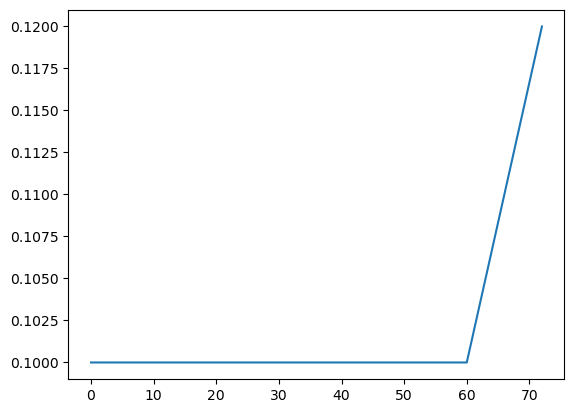

In [196]:
import seaborn as sb

data = avg_infected_points.get(0.01)
sb.lineplot(data)

<Axes: >

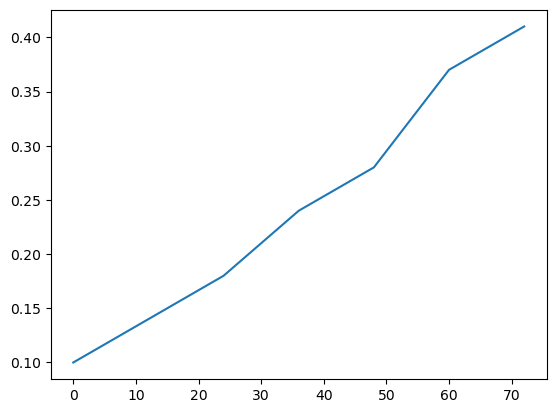

In [197]:
data = avg_infected_points.get(0.05)
sb.lineplot(data)

<Axes: >

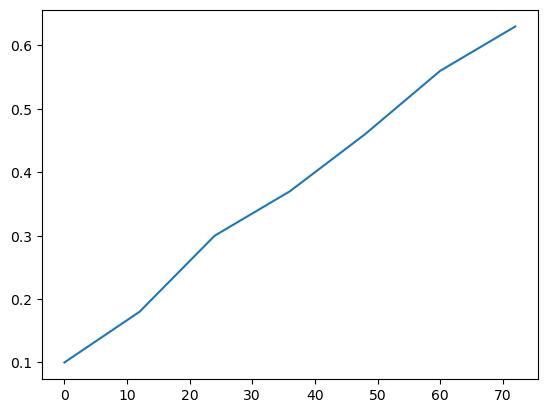

In [198]:
data = avg_infected_points.get(0.1)
sb.lineplot(data)

<Axes: >

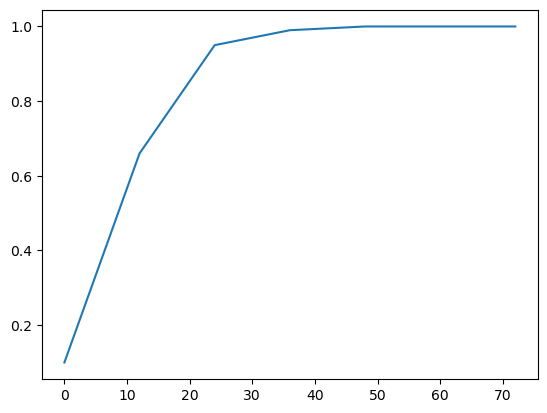

In [199]:
data = avg_infected_points.get(0.5)
sb.lineplot(data)

<Axes: >

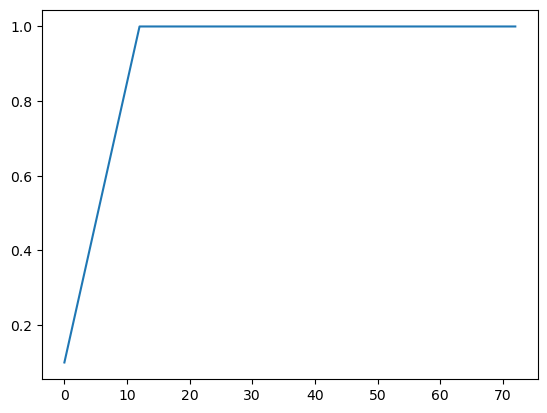

In [200]:
data = avg_infected_points.get(1)
sb.lineplot(data)

# Медианное время заражения каждого города при вероятности заражения в 0.5, 50 прогонов симуляции

In [210]:
import numpy as np

stats_50 = [0] * 50
for i in range(0, 49):
    stats_50[i] = simulate_infections(0, 0.5)
    
#print(stats_50)
    
airport_stats = [[], [], [], [], [], [], [], [], [], []]
for i in range(0, 10):
    airport_stats[i] = list()
    j = 0
    for l in range(0, 49):
        if (stats_50[l][i] >  -1):
            airport_stats[i].append(stats_50[l][i])
            j = j + 1

airport_infected_mesians = [0] * 10
for i in range(0, 10):
    airport_infected_mesians[i] = np.median(airport_stats[i])
    
for i in range(0, 10):
    print("Медианное время заражения аэропорта №", i, ' равно: ', airport_infected_mesians[i])

Медианное время заражения аэропорта № 0  равно:  0.0
Медианное время заражения аэропорта № 1  равно:  9.0
Медианное время заражения аэропорта № 2  равно:  4.0
Медианное время заражения аэропорта № 3  равно:  2.0
Медианное время заражения аэропорта № 4  равно:  8.0
Медианное время заражения аэропорта № 5  равно:  8.0
Медианное время заражения аэропорта № 6  равно:  11.0
Медианное время заражения аэропорта № 7  равно:  16.0
Медианное время заражения аэропорта № 8  равно:  10.0
Медианное время заражения аэропорта № 9  равно:  3.0


# Преобразовываем расписание в матрицу графа

In [258]:
def calculate_connections_graph_matix():
    mtx = [[0 for x in range(10)] for y in range(10)] 
    connections_count = 0
    for connections in time_table.values():
        for connection in connections:
            
            start = connection[0]
            dest = connection[1]
            
            #print("start: ", start, "dest: ", dest)
            
            mtx[start][dest] = mtx[start][dest] + 1
            mtx[dest][start] = mtx[start][dest] 
            connections_count = connections_count + 1
            
    for i in range(0, 10):
        for j in range(0, 10):
            #print(i, " x ", j ,": ",  mtx[i][j])
            mtx[i][j] = mtx[i][j] / connections_count
            #print("after: ",  mtx[i][j])
            #print(mtx[i][j])
            
    #print(connections_count)
            
    return mtx
        
            

matrix = calculate_connections_graph_matix()

# Рисуем граф, используя NetworkX

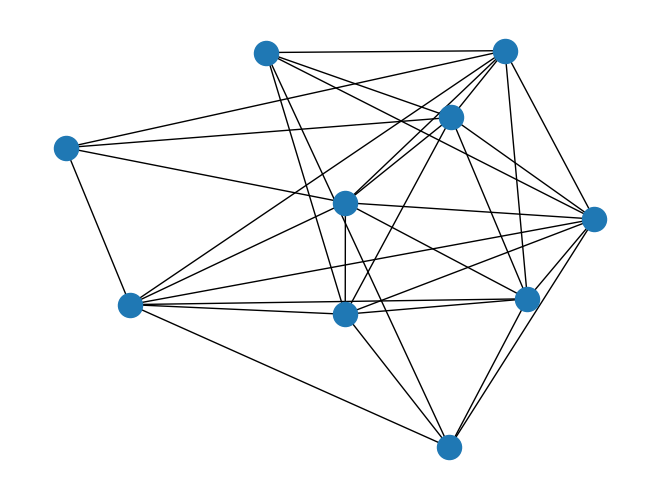

In [257]:
import networkx as nx
 
matrix_g = np.matrix(matrix)
g = nx.from_numpy_array(matrix_g)
nx.draw(g)

In [268]:
clusterings = [0] * 10
degrees = [0] * 10
betweenness_centralitiy = nx.betweenness_centrality(g, 10)

for i in range(0, 10):
    clusterings[i] = nx.clustering(g, i)
    degrees[i] = nx.degree(g, i)

In [271]:
#print(clusterings)
#print(degrees)
print(betweenness_centralitiy)

{0: 0.04953703703703703, 1: 0.05416666666666666, 2: 0.03009259259259259, 3: 0.032407407407407406, 4: 0.05185185185185185, 5: 0.018518518518518517, 6: 0.0125, 7: 0.03796296296296296, 8: 0.004629629629629629, 9: 0.06944444444444445}


<Axes: >

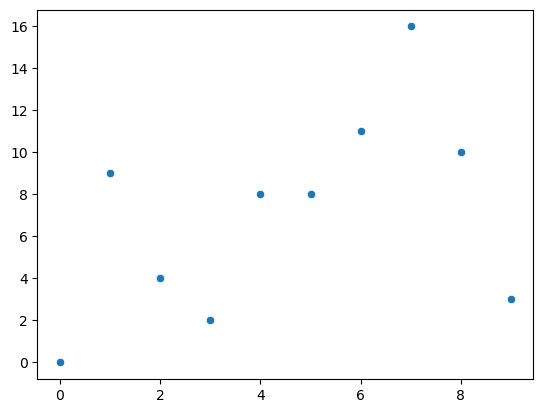

In [280]:
sb.scatterplot(data = airport_infected_mesians, legend = 'full')

<Axes: >

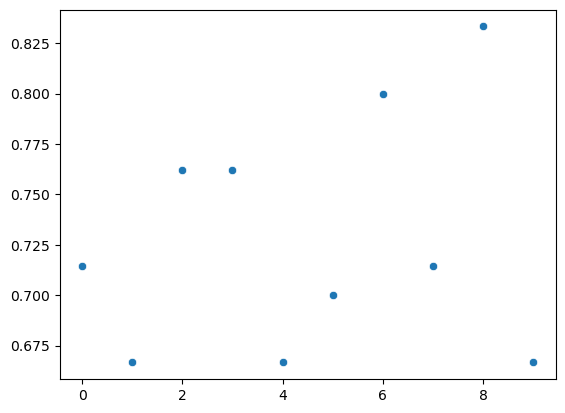

In [281]:
sb.scatterplot(data = clusterings, legend = 'brief')

<Axes: >

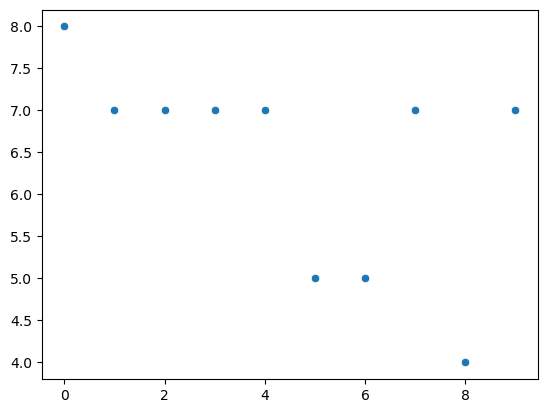

In [282]:
sb.scatterplot(data = degrees, legend = 'brief')

<Axes: >

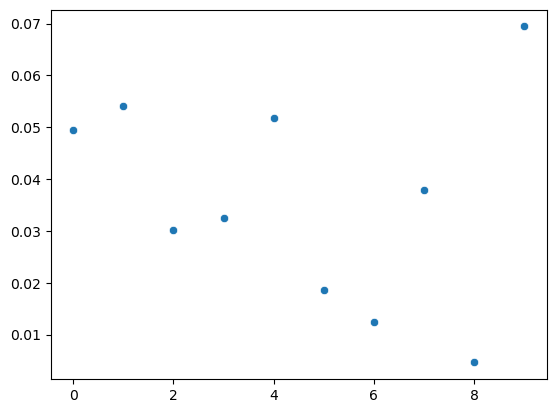

In [283]:
sb.scatterplot(data = betweenness_centralitiy, legend = 'brief')

In [291]:
from scipy import stats

cor_with_clusterings = stats.spearmanr(airport_infected_mesians, clusterings)
cor_with_degrees = stats.spearmanr(airport_infected_mesians, degrees)
betweenness_centralitiy_array = [0] * 10

for key in betweenness_centralitiy.keys():
    betweenness_centralitiy_array[key] = betweenness_centralitiy.get(key)


cor_with_betweenness_centralitiy = stats.spearmanr(airport_infected_mesians, betweenness_centralitiy_array)

In [293]:
print("cor_with_clusterings: ", cor_with_clusterings)
print("cor_with_degrees: ", cor_with_degrees)
print("cor_with_betweenness_centralitiy: ", cor_with_betweenness_centralitiy)

cor_with_clusterings:  SignificanceResult(statistic=0.21055154417265576, pvalue=0.5592995926587837)
cor_with_degrees:  SignificanceResult(statistic=-0.5981394863661084, pvalue=0.0677604828572462)
cor_with_betweenness_centralitiy:  SignificanceResult(statistic=-0.36474332620803873, pvalue=0.3000669694646655)
